In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

### Loading data

In [2]:
salary_train=pd.read_csv("C:\\Users\\Govind S\\Downloads\\ds\\ds files\\assignments\\svm\\SalaryData_Train(1).csv")

In [3]:
salary_test=pd.read_csv("C:\\Users\\Govind S\\Downloads\\ds\\ds files\\assignments\\svm\\SalaryData_Test(1).csv")

In [4]:
salary_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


### The data has a lot of categories in the native column. Combining all non us categories into one and label encoding

In [5]:
salary_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [9]:
salary_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


<AxesSubplot:xlabel='age', ylabel='Density'>

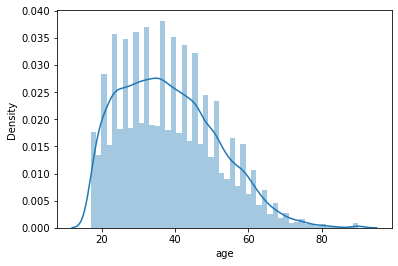

In [10]:
sns.distplot(salary_train.age)

<AxesSubplot:xlabel='hoursperweek', ylabel='Density'>

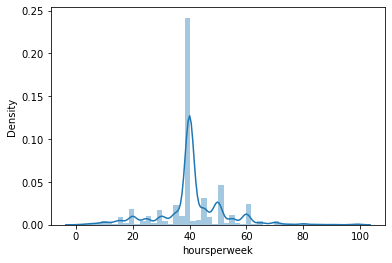

In [13]:
sns.distplot(salary_train.hoursperweek)

<AxesSubplot:xlabel='capitalgain', ylabel='Density'>

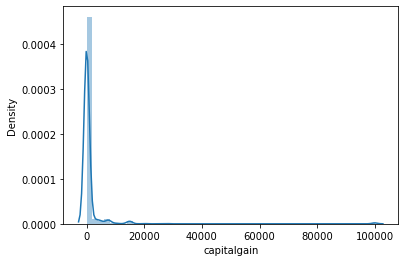

In [15]:
sns.distplot(salary_train.capitalgain)

<AxesSubplot:xlabel='capitalloss', ylabel='Density'>

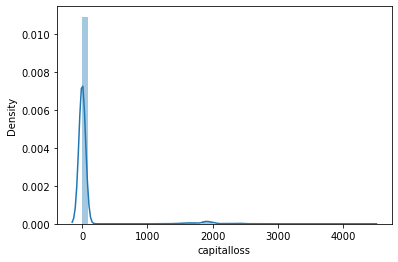

In [16]:
sns.distplot(salary_train.capitalloss)

In [81]:
salary_train.loc[salary_train['native']==' United-States','native']=0
salary_test.loc[salary_test['native']==' United-States','native']=0

In [82]:
salary_train.loc[salary_train['native']!=0,'native']=1
salary_test.loc[salary_test['native']!=0,'native']=1

In [83]:
salary_train.native.value_counts()

0    27504
1     2657
Name: native, dtype: int64

In [84]:
salary_train.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

### Label encoding sex and salary columns since there are only 2 categories

In [85]:
le=preprocessing.LabelEncoder()
salary_train['sex']=le.fit_transform(salary_train['sex'])
salary_train['Salary']=le.fit_transform(salary_train['Salary'])
salary_test['sex']=le.fit_transform(salary_test['sex'])
salary_test['Salary']=le.fit_transform(salary_test['Salary'])

In [86]:
salary_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,0,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,0,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,0,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,0,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,0,0,0,38,0,0
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,1,0,0,40,0,1
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,0,0,0,40,0,0
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,1,0,0,20,0,0


In [87]:
salary_train.education.value_counts()

 HS-grad         9840
 Some-college    6677
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: education, dtype: int64

### Education has a lot of categories. So combining some of the categories

In [88]:
salary_train.loc[salary_train['education']==' Preschool','education']='school'
salary_train.loc[salary_train['education']==' 1st-4th','education']='school'
salary_train.loc[salary_train['education']==' 5th-6th','education']='school'
salary_train.loc[salary_train['education']==' 7th-8th','education']='school'
salary_train.loc[salary_train['education']==' 9th','education']='school'
salary_train.loc[salary_train['education']==' 10th','education']='school'
salary_train.loc[salary_train['education']==' 11th','education']='school'
salary_train.loc[salary_train['education']==' 12th','education']='school'
salary_train.loc[salary_train['education']==' Assoc-voc','education']='Associate'
salary_train.loc[salary_train['education']==' Assoc-acdm','education']='Associate'
salary_train.loc[salary_train['education']==' HS-grad','education']='high-school'
salary_train.loc[salary_train['education']==' Some-college','education']='high-school'
salary_train.education.value_counts()

high-school     16517
 Bachelors       5044
school           3741
Associate        2315
 Masters         1627
 Prof-school      542
 Doctorate        375
Name: education, dtype: int64

In [89]:
salary_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,1,0,0,40,0,0
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,1,0,0,50,0,0
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,1,0,0,40,0,1
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,1,7688,0,40,0,1
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,1,0,0,30,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,1,0,0,40,0,0
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,0,0,0,36,0,0
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,1,0,0,50,0,0
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,1,5455,0,40,0,0


### Doing the same for test data

In [90]:
salary_test.loc[salary_test['education']==' Preschool','education']='school'
salary_test.loc[salary_test['education']==' 1st-4th','education']='school'
salary_test.loc[salary_test['education']==' 5th-6th','education']='school'
salary_test.loc[salary_test['education']==' 7th-8th','education']='school'
salary_test.loc[salary_test['education']==' 9th','education']='school'
salary_test.loc[salary_test['education']==' 10th','education']='school'
salary_test.loc[salary_test['education']==' 11th','education']='school'
salary_test.loc[salary_test['education']==' 12th','education']='school'
salary_test.loc[salary_test['education']==' Assoc-voc','education']='Associate'
salary_test.loc[salary_test['education']==' Assoc-acdm','education']='Associate'
salary_test.loc[salary_test['education']==' HS-grad','education']='high-school'
salary_test.loc[salary_test['education']==' Some-college','education']='high-school'

In [91]:
salary_train.maritalstatus.value_counts()

 Married-civ-spouse       14065
 Never-married             9725
 Divorced                  4214
 Separated                  939
 Widowed                    827
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: maritalstatus, dtype: int64

### Combining categories for thr marital status column

In [92]:
salary_train.loc[salary_train['maritalstatus']==' Married-AF-spouse','maritalstatus']='married'
salary_train.loc[salary_train['maritalstatus']==' Married-civ-spouse','maritalstatus']='married'
salary_train.loc[salary_train['maritalstatus']==' Divorced','maritalstatus']='not married'
salary_train.loc[salary_train['maritalstatus']==' Separated','maritalstatus']='not married'
salary_train.loc[salary_train['maritalstatus']==' Married-spouse-absent','maritalstatus']='not married'

In [93]:
salary_train.maritalstatus.value_counts()

married           14086
 Never-married     9725
not married        5523
 Widowed            827
Name: maritalstatus, dtype: int64

In [94]:
salary_test.loc[salary_test['maritalstatus']==' Married-AF-spouse','maritalstatus']='married'
salary_test.loc[salary_test['maritalstatus']==' Married-civ-spouse','maritalstatus']='married'
salary_test.loc[salary_test['maritalstatus']==' Divorced','maritalstatus']='not married'
salary_test.loc[salary_test['maritalstatus']==' Separated','maritalstatus']='not married'
salary_test.loc[salary_test['maritalstatus']==' Married-spouse-absent','maritalstatus']='not married'

In [95]:
salary_train.occupation.value_counts()

 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1965
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64

### Combining some categories of occupation column

adm clerical=admin

armed forces=military

craft repair,farming-fishing,handlers-cleaners,machine-op-inspect,transport-moving=blue collar

exec managerical=white collar

other service,priv-house-service=service

prof-speciality=professional

protective-serv,tech-sypport=others

In [96]:
salary_train.loc[salary_train['occupation']==' Craft-repair','occupation']='blue collar'
salary_train.loc[salary_train['occupation']==' Farming-fishing','occupation']='blue collar'
salary_train.loc[salary_train['occupation']==' Handlers-cleaners','occupation']='blue collar'
salary_train.loc[salary_train['occupation']==' Machine-op-inspct','occupation']='blue collar'
salary_train.loc[salary_train['occupation']==' Transport-moving','occupation']='blue collar'
salary_train.loc[salary_train['occupation']==' Other-service','occupation']='service'
salary_train.loc[salary_train['occupation']==' Priv-house-serv','occupation']='service'
salary_train.loc[salary_train['occupation']==' Protective-serv','occupation']='others'
salary_train.loc[salary_train['occupation']==' Tech-support','occupation']='others'
salary_train.loc[salary_train['occupation']==' Adm-clerical','occupation']='admin'
salary_train.loc[salary_train['occupation']==' Armed-Forces','occupation']='military'
salary_train.loc[salary_train['occupation']==' Exec-managerial','occupation']='white collar'
salary_train.loc[salary_train['occupation']==' Prof-specialty','occupation']='professional'
salary_train.occupation.value_counts()

blue collar     9906
professional    4038
white collar    3992
admin           3721
 Sales          3584
service         3355
others          1556
military           9
Name: occupation, dtype: int64

In [97]:
salary_test.loc[salary_test['occupation']==' Craft-repair','occupation']='blue collar'
salary_test.loc[salary_test['occupation']==' Farming-fishing','occupation']='blue collar'
salary_test.loc[salary_test['occupation']==' Handlers-cleaners','occupation']='blue collar'
salary_test.loc[salary_test['occupation']==' Machine-op-inspct','occupation']='blue collar'
salary_test.loc[salary_test['occupation']==' Transport-moving','occupation']='blue collar'
salary_test.loc[salary_test['occupation']==' Other-service','occupation']='service'
salary_test.loc[salary_test['occupation']==' Priv-house-serv','occupation']='service'
salary_test.loc[salary_test['occupation']==' Protective-serv','occupation']='others'
salary_test.loc[salary_test['occupation']==' Tech-support','occupation']='others'
salary_test.loc[salary_test['occupation']==' Adm-clerical','occupation']='admin'
salary_test.loc[salary_test['occupation']==' Armed-Forces','occupation']='military'
salary_test.loc[salary_test['occupation']==' Exec-managerial','occupation']='white collar'
salary_test.loc[salary_test['occupation']==' Prof-specialty','occupation']='professional'

In [98]:
salary_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  int32 
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  int32 
dtypes: int32(2), int64(5), object(7)
memory usage: 3.0+ MB


In [99]:
salary_train.relationship.value_counts()

 Husband           12463
 Not-in-family      7726
 Own-child          4466
 Unmarried          3212
 Wife               1406
 Other-relative      888
Name: relationship, dtype: int64

In [100]:
salary_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,admin,Not-in-family,White,1,2174,0,40,0,0
1,50,Self-emp-not-inc,Bachelors,13,married,white collar,Husband,White,1,0,0,13,0,0
2,38,Private,high-school,9,not married,blue collar,Not-in-family,White,1,0,0,40,0,0
3,53,Private,school,7,married,blue collar,Husband,Black,1,0,0,40,0,0
4,28,Private,Bachelors,13,married,professional,Wife,Black,0,0,0,40,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Associate,12,married,others,Wife,White,0,0,0,38,0,0
30157,40,Private,high-school,9,married,blue collar,Husband,White,1,0,0,40,0,1
30158,58,Private,high-school,9,Widowed,admin,Unmarried,White,0,0,0,40,0,0
30159,22,Private,high-school,9,Never-married,admin,Own-child,White,1,0,0,20,0,0


In [101]:
salary_train.workclass.value_counts()

 Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64

### Combining some categories for workclass column

In [102]:
salary_train.loc[salary_train['workclass']==' Local-gov','workclass']='other-gov'
salary_train.loc[salary_train['workclass']==' State-gov','workclass']='other-gov'
salary_train.loc[salary_train['workclass']==' Self-emp-not-inc','workclass']='self-emp'
salary_train.loc[salary_train['workclass']==' Self-emp-inc','workclass']='self-emp'
salary_train.loc[salary_train['workclass']==' Without-pay','workclass']=' Private'
salary_train.workclass.value_counts()

 Private        22299
self-emp         3573
other-gov        3346
 Federal-gov      943
Name: workclass, dtype: int64

In [103]:
salary_test.loc[salary_test['workclass']==' Local-gov','workclass']='other-gov'
salary_test.loc[salary_test['workclass']==' State-gov','workclass']='other-gov'
salary_test.loc[salary_test['workclass']==' Self-emp-not-inc','workclass']='self-emp'
salary_test.loc[salary_test['workclass']==' Self-emp-inc','workclass']='self-emp'
salary_test.loc[salary_test['workclass']==' Without-pay','workclass']=' Private'

In [104]:
salary_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  int32 
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  int32 
dtypes: int32(2), int64(5), object(7)
memory usage: 1.5+ MB


In [105]:
salary_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,other-gov,Bachelors,13,Never-married,admin,Not-in-family,White,1,2174,0,40,0,0
1,50,self-emp,Bachelors,13,married,white collar,Husband,White,1,0,0,13,0,0
2,38,Private,high-school,9,not married,blue collar,Not-in-family,White,1,0,0,40,0,0
3,53,Private,school,7,married,blue collar,Husband,Black,1,0,0,40,0,0
4,28,Private,Bachelors,13,married,professional,Wife,Black,0,0,0,40,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Associate,12,married,others,Wife,White,0,0,0,38,0,0
30157,40,Private,high-school,9,married,blue collar,Husband,White,1,0,0,40,0,1
30158,58,Private,high-school,9,Widowed,admin,Unmarried,White,0,0,0,40,0,0
30159,22,Private,high-school,9,Never-married,admin,Own-child,White,1,0,0,20,0,0


### Creating dummy columns for the categorical features

In [106]:
salary_train=pd.get_dummies(salary_train,columns=['workclass', 'education','maritalstatus','occupation', 'relationship', 'race','native',])
salary_test=pd.get_dummies(salary_test,columns=['workclass', 'education','maritalstatus','occupation', 'relationship', 'race','native',])

In [108]:
salary_train.drop(['educationno'],axis=1,inplace=True)
salary_test.drop(['educationno'],axis=1,inplace=True)

In [109]:
x_train=salary_train.drop(['Salary'],axis=1)
y_train=salary_train['Salary']
x_test=salary_test.drop(['Salary'],axis=1)
y_test=salary_test['Salary']

In [110]:
ss=preprocessing.StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

### Doing PCA to reduce the number of columns

In [111]:
pca=PCA()
pca_values=pca.fit_transform(x_train)
x_test=pca.transform(x_test)

In [112]:
pca_values

array([[-1.01120362e+00, -2.33987395e+00,  8.32665211e-01, ...,
        -2.26033545e-14,  2.02264663e-15,  2.94785206e-15],
       [ 2.78426834e+00, -1.11067523e+00,  5.42531759e-01, ...,
        -1.51992665e-14,  4.31071030e-15,  2.43437567e-15],
       [-9.00980255e-01, -3.15932644e-01, -1.00321652e+00, ...,
        -1.03653341e-15, -5.22243499e-15, -1.27184825e-15],
       ...,
       [-1.71797418e+00, -1.72265385e+00,  7.91395261e-01, ...,
        -6.40552749e-17, -1.47472659e-16,  2.37651575e-18],
       [-2.57839395e+00,  2.66188606e-01, -2.15669024e+00, ...,
        -8.61051690e-17, -1.93567730e-16,  2.60908087e-17],
       [ 1.65725056e+00, -1.78238922e+00,  8.49648474e-01, ...,
        -4.83622147e-16, -2.40806568e-16, -2.58879625e-17]])

In [113]:
var=np.cumsum(pca.explained_variance_ratio_)
var

array([0.09915244, 0.16148272, 0.22268737, 0.27415617, 0.31741776,
       0.35659126, 0.39377179, 0.42987964, 0.4631497 , 0.49549384,
       0.52506331, 0.55413327, 0.58237903, 0.60989287, 0.63663059,
       0.66278123, 0.68847947, 0.71365745, 0.7386185 , 0.76303985,
       0.7871576 , 0.81114133, 0.83390026, 0.85636455, 0.87749857,
       0.89735489, 0.91646374, 0.93496962, 0.95271113, 0.96805757,
       0.9794159 , 0.9903634 , 0.99950651, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        ])

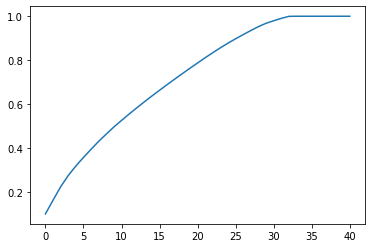

In [114]:
plt.plot(var)

### Taking first 18 principal components which covers 70% of the variance in the data

In [115]:
x1=pca_values[:,:18]
xtest=x_test[:,:18]

In [116]:
x1.shape

(30161, 18)

In [117]:
xtest.shape

(15060, 18)

In [ ]:
### Running a for loop to find the best gamma and C values for SVM

In [120]:
gamma=[100,50,0.5,0.1,0.01,0.001,0.0001]
c=[15,14,13,12,11,10,0.1,0.001,0.0001]
params=[]
accuracy=[]

for i in gamma:
    for j in c:
        clf=SVC(kernel='rbf',gamma=i,C=j)
        clf.fit(x1,y_train)
        pred=clf.predict(xtest)
        acc=accuracy_score(y_test,pred)
        params.append((i,j))
        accuracy.append(acc)

In [121]:
np.max(accuracy)

0.8422974767596282

In [122]:
params[accuracy.index(np.max(accuracy))]

(0.01, 13)

In [127]:
clf_final=SVC(kernel='rbf',gamma=0.01,C=13)
clf_final.fit(x1,y_train)
pred=clf_final.predict(xtest)
accuracy_score(y_test,pred)

0.8422974767596282

### Weget a max accuracy of 84.23% at gamma=0.01 and C=13

In [130]:
confusion_matrix(y_test,pred)

array([[10633,   727],
       [ 1648,  2052]], dtype=int64)

In [131]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90     11360
           1       0.74      0.55      0.63      3700

    accuracy                           0.84     15060
   macro avg       0.80      0.75      0.77     15060
weighted avg       0.83      0.84      0.83     15060

